# Examen final



Curso IAC01.

Autor: Alejandro Mata Ali

En este examen final tendremos 10 preguntas para evaluar el nivel de comprensión de la materia impartida. Una vez finalizado, enviadme las respuestas por correo. Son 5 preguntas test y 5 preguntas de rellenar código.

Las test respondedlas poniendo en el markdown vuestra respuesta, solo hay una correcta.

Cada pregunta suma un punto, y para aprobar necesitáis sumar 5 puntos. Podéis programar lo que queráis mientras lo realizais.

## Librerías

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram
import numpy as np
from scipy.linalg import expm

# Pregunta 1

¿Para qué sirve el SWAP Test?



1.   Calcular la similitud entre dos estados cuánticos.
2.   Calcular el valor esperado del operador Identidad.
3.   Eliminar el entrelazamiento de dos qubits.
4.   Intercambiar el estado de dos qubits.



**Respuesta** 1: Calcular la similitud entre dos estados cuánticos, porque está diseñado para medir la fidelidad entre dos estados desconocidos.

# Pregunta 2

Selecciona la frase falsa.

1. La transformada cuántica de Fourier genera un nuevo estado que es la transformada de Fourier inversa del estado de entrada.
2. La transformada cuántica de Fourier no tiene una puerta propia en Qiskit.
3. La estimación cuántica de fase requiere una puerta QFT inversa.
4. La estimación cuántica de fase es reversible.

**Respuesta** falsa es la número 1, porque la que requiere la transformada inversa es la estimación de fase, la directa se aplica a la entrada.

# Pregunta 3

¿Qué condición no es necesaria para aplicar el LCU?

1. La matriz a aplicar debe ser unitaria.
2. La matriz a aplicar debe ser una combinación lineal de unitarias.
3. La combinación lineal debe cumplir una condición de normalización.
4. Hace falta tener qubits extra para realizar la operación.

**Respuesta** La condición que no es necesaria es la número 1, "que la matriz sea unitaria" porque este método sirve para implementar operadores que no tienen por qué ser unitarios siempre que puedan descomponerse como una combinación de lineal de un conjunto de puertas unitarias.

# Pregunta 4

Selecciona la frase correcta.

1. En el HHL se puede resolver cualquier tipo de problema, la matriz no debe cumplir ninguna condición especial.
2. La ventaja en el HHL surge solo si la matriz a resolver es sparse y no queremos la solución explícita.
3. El HHL no requiere el uso de ninguna operación no unitaria.
4. El HHL es un buen algoritmo para los ordenadores cuánticos actuales.

**Respuesta** correcta es la número 2, "La ventaja en el HHL surge solo si la matriz a resolver es sparse y no queremos la solución explícita" porque este algoritmo está diseñado resolver sistemas de ecuaciones lineales.

# Pregunta 5

Selecciona la frase falsa.

1. El algoritmo de Shor es un algoritmo no realizable actualmente para problemas medianos y grandes (más de n=20 bits).
2. Se puede hacer un algoritmo de Shor con solamente 2n+3 qubits.
3. El algoritmo de Shor siempre obtiene el resultado deseado.
4. El algoritmo de Shor requiere aplicar repetidamente una puerta unitaria controladamente.


**Respuesta** falsa es la número 3, "El algoritmo Shor siempre obtiene el resultado deseado", porque es un algoritmo probabilístico, en cada ejecución existe una probabilidad de error.

# Pregunta 6

Crea un circuito que realice el SWAP Test para 2 estados que quieras. El requisito será que el qubit auxiliar (el que vas a medir) esté abajo y los de los estados arriba. Algo así

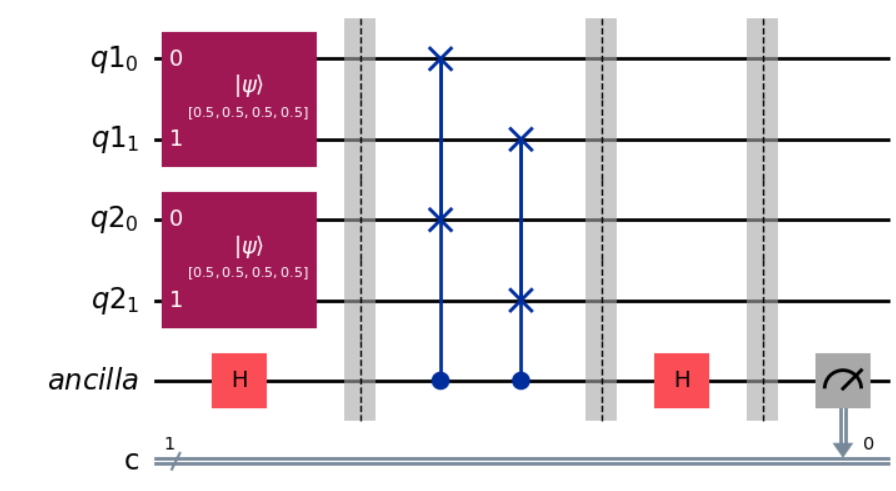

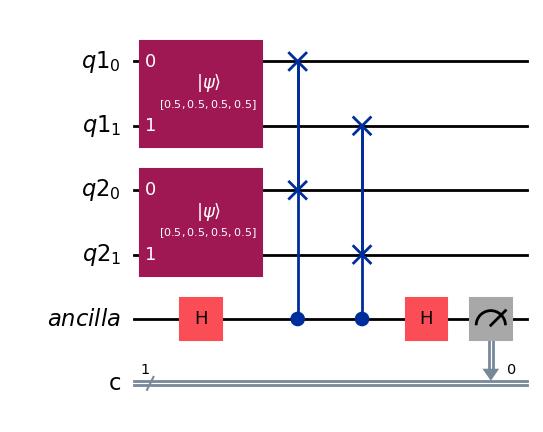

In [12]:
# Respuesta
state = np.array([0.5, 0.5, 0.5, 0.5])
qr1 = QuantumRegister(2, 'q1')
qr2 = QuantumRegister(2, 'q2')
anc = QuantumRegister(1, 'ancilla')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr1, qr2, anc, cr, name='SWAP_Test')
qc.initialize(state, qr1)
qc.initialize(state, qr2)
qc.h(anc[0])
for i in range(2):
    qc.cswap(anc[0], qr1[i], qr2[i])
qc.h(anc[0])
qc.measure(anc[0], cr[0])
qc.draw('mpl')

# Pregunta 7

Haz un circuito de 5 qubits en el cual añadas una QFT inversa (la de Qiskit) en los 3 últimos qubits. Esto es, este circuito concreto:

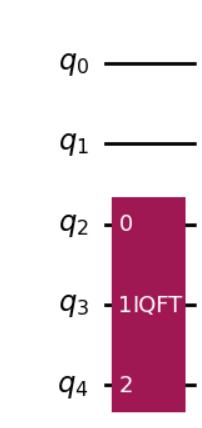

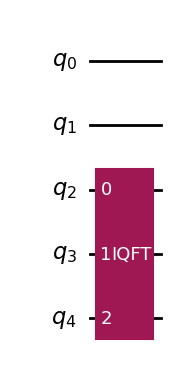

In [13]:
from qiskit.circuit.library import QFT
qc = QuantumCircuit(5)
qc.append(QFT(3, do_swaps=True, inverse=True, name='IQFT'), [2,3,4])
qc.draw('mpl')

# Pregunta 8

Dado el Operador

```
def Operator():
    qc = QuantumCircuit(3, name='Operator')
    qc.p(0.3*2*np.pi,0)
    qc.p(0.4*2*np.pi,1)
    qc.p(-0.5*2*np.pi,2)

    return qc.to_gate()

```
Calcula el ángulo $\theta$ del autovalor de este operador para el estado $|\psi\rangle$
```
state=np.array([0,0,0,1,0,0,0,0.])
state /= np.linalg.norm(state)
```

definido como
$$Operador|\psi\rangle = e^{i2\pi \theta}|\psi\rangle$$

Tienes que construir el circuito adecuado y ejecutarlo en simulador. Debes acertar al menos el primer decimal.

In [ ]:
def Operator():
    qc = QuantumCircuit(3, name='Operator')
    qc.p(0.3*2*np.pi,0)
    qc.p(0.4*2*np.pi,1)
    qc.p(-0.5*2*np.pi,2)

    return qc.to_gate()

state=np.array([0,0,0,1,0,0,0,0.])
state /= np.linalg.norm(state)

In [ ]:
import cmath
def Phase(angle):
    return np.array([[1,0],[0,np.exp(1j*angle)]])

matrix = np.kron(Phase(-0.5*2*np.pi), np.kron(Phase(0.4*2*np.pi), Phase(0.3*2*np.pi)))

print(state)
print(matrix@state)
print('Fase en ángulo:  ', cmath.phase((matrix@state)[3])/(2*np.pi))
print('Si supera 1 o es negativo, entonces es: ', cmath.phase((matrix@state)[3])/(2*np.pi)%1)

[0. 0. 0. 1. 0. 0. 0. 0.]
[ 0.        +0.j          0.        +0.j          0.        +0.j
 -0.30901699-0.95105652j  0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j        ]
Fase en ángulo:   -0.30000000000000004
Si supera 1 o es negativo, entonces es:  0.7


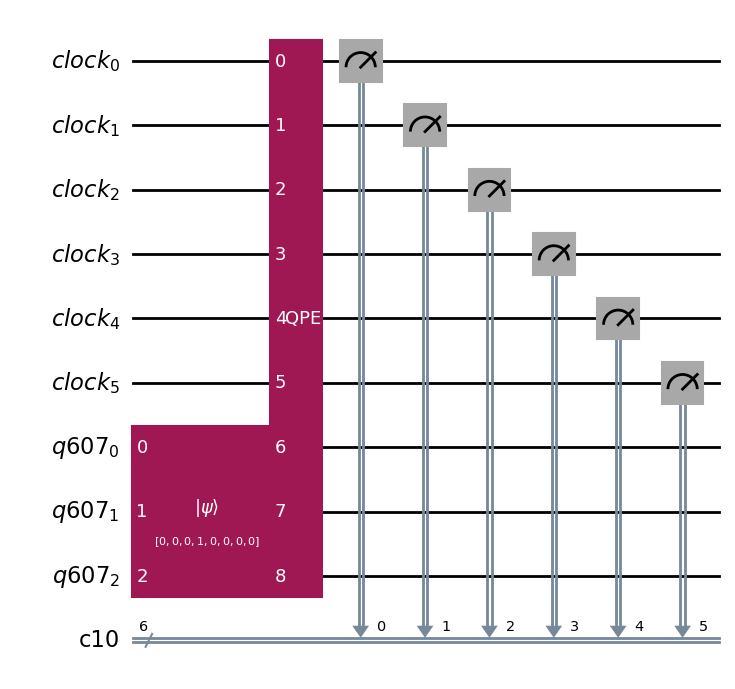

In [ ]:
### NO RESPONDIDA ###

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:506: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


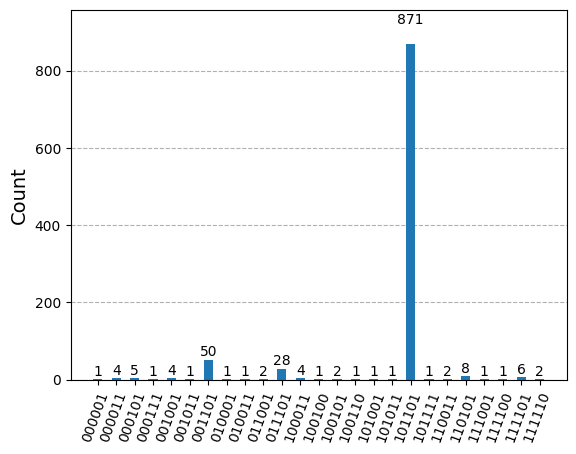

In [ ]:
### NO RESPONDIDA ###

Con esta celda puedes comprobar el resultado.

In [ ]:
salida = '101101'#Aqui pon tu solucion en el string

valor = int(salida, 2)/2**m
print(valor)

0.703125


# Pregunta 9

Transforma la matriz
```
A = np.array([[1,2j,0],[-1,3,0.5],[-7,3,2]])
```
para que sea compatible con el algoritmo HHL.

In [2]:
A = np.array([[1,2j,0],[-1,3,0.5],[-7,3,2]])
A

array([[ 1. +0.j,  0. +2.j,  0. +0.j],
       [-1. +0.j,  3. +0.j,  0.5+0.j],
       [-7. +0.j,  3. +0.j,  2. +0.j]])

In [3]:
# Respuesta
A_dag = A.conjugate().T
zero = np.zeros_like(A)
A_tilde = np.block([[zero, A], [A_dag, zero]])
A_tilde

array([[ 0. +0.j,  0. +0.j,  0. +0.j,  1. +0.j,  0. +2.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -1. +0.j,  3. +0.j,  0.5+0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -7. +0.j,  3. +0.j,  2. +0.j],
       [ 1. -0.j, -1. -0.j, -7. -0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. -2.j,  3. -0.j,  3. -0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. -0.j,  0.5-0.j,  2. -0.j,  0. +0.j,  0. +0.j,  0. +0.j]])

# Pregunta 10

Si tienes un ordenador cuántico perfecto de 156 qubits, cual es el número más grande que puedes descomponer mediante el Shor con él? (Dime el orden de magnitud, 100, 1000, etc. No hace falta que me digas un número factorizable en 2 primos).

**Respuesta**: Una implementación de Shor necesita de 2n+3 qubits para factorizar un número de n bits. Por lo que con 156 qubits, y resolviendo la ecuación, se podría resolver un número de 76 bits aprox., que a su vez es del orden de 2 elevado a 76, cuya magnitud es del orden de 10 elevado a 23.